# Analysis of sequential DNA-MERFISH for SI14

by Pu Zheng

2022.05.30

analysis for dataset:

\\10.245.74.158\Chromatin_NAS_7\20220616-hSTG0308_SI14_from_0601


In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

80504


# 0. fov parameters

In [2]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_7\20220616-hSTG0308_SI14_from_0601',
             'save_folder':r'F:\Pu_Temp\20220616-hSTG0308_SI14_from_0601',
             'experiment_type': 'DNA',
             'num_threads': 44,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647','561'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 20000,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

# 1. Process Fov

In [4]:
folders, fovs = ia.io_tools.data.get_folders(fov_param['data_folder'])

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 23
- Number of field of views: 205


## 1.1 fov 0-5, process with save-image

In [ ]:
_overwrite = False
_fit_spots = True
_warp_images = False

#_save_images = True
bad_fov_ids = [19]

for _fov_id, _fov_name in enumerate(fovs):
    
    if _fov_id < 5:
        _save_images = True
    else:
        _save_images = False
    
    if _fov_id in bad_fov_ids:
        continue
    
    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=False, # whether overwrite
                                              )
    # 2. Process image into candidate spots
    fov.parallel = True
    fov.combo_ref_id = 0
    fov._process_image_to_spots('combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=_warp_images, 
                                _fit_spots=_fit_spots,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite,
                                _verbose=True)
    # 3. Process DAPI image
    dapi_im = fov._load_dapi_image()
    # 4. Process chrom
    #chrom_im = fov._load_chromosome_image()
    

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 23
- Number of field of views: 205
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_7\20220616-hSTG0308_SI14_from_0601\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38'])
- 23 folders are found according to color-usage annotation.
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_561_2048_2048.npy
++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 750 chromatic

++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048.npy
	 647 None
	 561 chromatic_correction_561_647_50_2048_2048.npy
++ load chromatic_constants correction profile from original file.
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048_const.pkl
	 647 None
	 561 chromatic_correction_561_647_50_2048_2048_const.pkl
++ load illumination correction profile from original file.
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
	 405 illumination_correction_405_2048x2048.npy
- Creating save file for fov:Conv_zscan_021.dax: F:\Pu_Temp\20220616-hSTG0308_SI14_from_0601\Conv_zscan_021.hdf5.
* create savefile: F:\Pu_Temp\20220616-hSTG0308_SI14_f

	 561 illumination_correction_561_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
	 405 illumination_correction_405_2048x2048.npy
- Creating save file for fov:Conv_zscan_022.dax: F:\Pu_Temp\20220616-hSTG0308_SI14_from_0601\Conv_zscan_022.hdf5.
* create savefile: F:\Pu_Temp\20220616-hSTG0308_SI14_from_0601\Conv_zscan_022.hdf5
-- saving fov_info to file: F:\Pu_Temp\20220616-hSTG0308_SI14_from_0601\Conv_zscan_022.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 'correction_folder', 'dapi_channel', 'dapi_channel_index', 'data_folder', 'debug', 'drift', 'drift_channel', 'drift_filename', 'drift_folder', 'experiment_folder', 'folders', 'fov_id', 'fov_name', 'map_folder', 'num_threads', 'parallel', 'ref_filename', 'ref_id', 'rotation', 'save_filename', 'save_folder', 'segmentation_dim', 'segmentation_folder', 'shared_parameters', 'use_dapi', 'verbose'] in 0.038s.
-- saving segmentation to file: F:\P

++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 'correction_folder', 'dapi_channel', 'dapi_channel_index', 'data_folder', 'debug', 'drift', 'drift_channel', 'drift_filename', 'drift_folder', 'experiment_folder', 'folders', 'fov_id', 'fov_name', 'map_folder', 'num_threads', 'parallel', 'ref_filename', 'ref_id', 'rotation', 'save_filename', 'save_folder', 'segmentation_dim', 'segmentation_folder', 'shared_parameters', 'use_dapi', 'verbose'] in 0.028s.
-- saving segmentation to file: F:\Pu_Temp\20220616-hSTG0308_SI14_from_0601\Conv_zscan_023.hdf5
-- saving correction to file: F:\Pu_Temp\20220616-hSTG0308_SI14_from_0601\Conv_zscan_023.hdf5
-- saving 750_illumination profile to save_file: F:\Pu_Temp\20220616-hSTG0308_SI14_from_0601\Conv_zscan_023.hdf5.
-- saving 647_illumination profile to save_file: F:\Pu_Temp\20220616-hSTG0308_SI14_from_0601\Conv_zscan_023.hdf5.
-- saving 561_illumination profile to save_file: F:

-- saving 561_illumination profile to save_file: F:\Pu_Temp\20220616-hSTG0308_SI14_from_0601\Conv_zscan_024.hdf5.
-- saving 488_illumination profile to save_file: F:\Pu_Temp\20220616-hSTG0308_SI14_from_0601\Conv_zscan_024.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20220616-hSTG0308_SI14_from_0601\Conv_zscan_024.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20220616-hSTG0308_SI14_from_0601\Conv_zscan_024.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20220616-hSTG0308_SI14_from_0601\Conv_zscan_024.hdf5.
-- saving 561_chromatic profile to save_file: F:\Pu_Temp\20220616-hSTG0308_SI14_from_0601\Conv_zscan_024.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20220616-hSTG0308_SI14_from_0601\Conv_zscan_024.hdf5.
-- 647_chromatic_constants profile already exist in save_file: F:\Pu_Temp\20220616-hSTG0308_SI14_from_0601\Conv_zscan_024.hdf5, skip.
-- savi

## Check DAPI

<IPython.core.display.Javascript object>


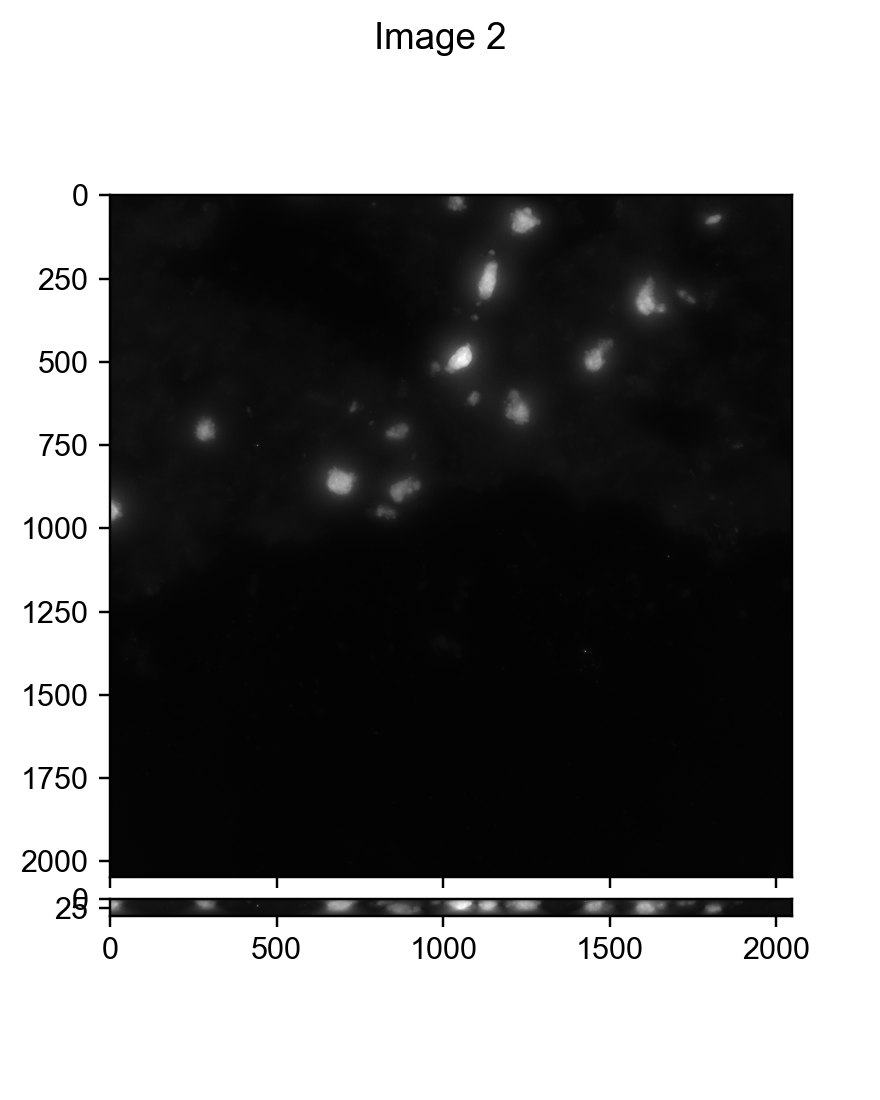

In [17]:
visual_tools.imshow_mark_3d_v2([fov.chrom_im, fov.dapi_im])

## Check images

In [26]:
# load images
fov._load_from_file('combo')

with h5py.File(fov.save_filename, 'r') as _f:
    combo_ims = _f['combo/ims'][np.where(fov.combo_flags)[0]]
    

+ loading combo from file: F:\Pu_Temp\20220616-hSTG0308_SI14_from_0601\Conv_zscan_000.hdf5


<IPython.core.display.Javascript object>


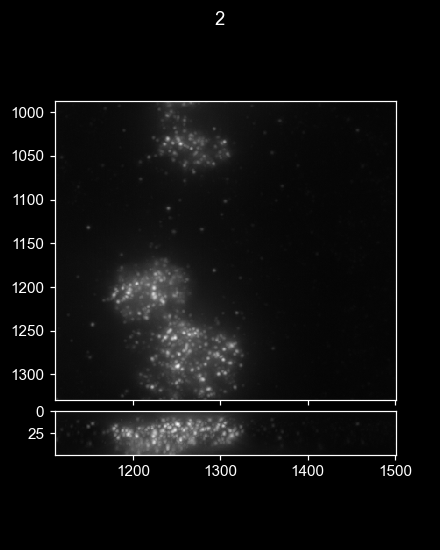

In [29]:
plt.style.use('dark_background')
visual_tools.imshow_mark_3d_v2(combo_ims, min_max_default=[1000,15000], image_names=fov.combo_ids)

## Check spot fitting

## Plot all spots

<IPython.core.display.Javascript object>


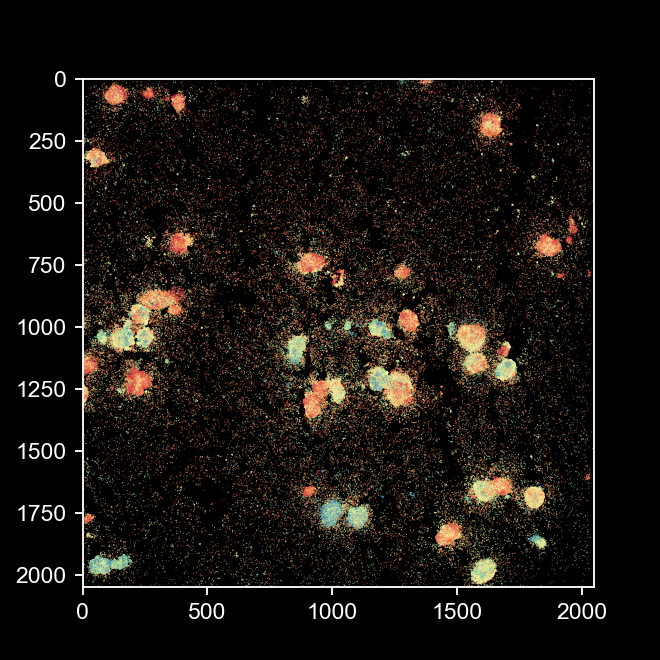

In [41]:
# scatter plot
fig, ax = plt.subplots(figsize=(4,4),dpi=150)
for _bit, _spots in zip(fov.combo_ids, fov.combo_spots_list):
    ax.scatter(_spots[:,2], _spots[:,3], s=0.2, 
               c=_spots[:,1], cmap='Spectral', linewidths=0, label=f'{_bit}',alpha=0.5)
ax.set_xlim([0,fov.shared_parameters['single_im_size'][1]])
ax.set_ylim([fov.shared_parameters['single_im_size'][2],0])
fig.show()
#fig.savefig(os.path.join(spots_figure_folder, 'Spots2D.png'), transparent=False)